### Importing the necesary libraries

In [1]:
import tensorflow as tf
import numpy as np
import random
from tqdm import tqdm

### Getting the data from keras.datasets -> MNIST
### Reference LINK : http://yann.lecun.com/exdb/mnist/

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images,test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64) 

11501568/11490434 [==============================] - 0s 0us/step


### Plotting the handwritten pictures

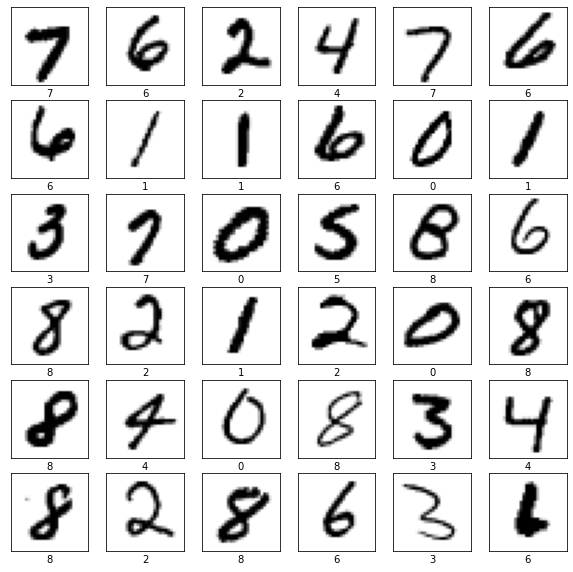

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
  plt.subplot(6,6,1+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

## Note: I have used two models here.
### 1. Fully connected neural network

#### Approach: 
1. We first flatten the images data to a 1-D vector
2. We use one hidden layer which has 128 nodes with non linearity function : ReLU
3. We use a output layer which has 10 outputs[0-9] which will have the probability of each possibility for each input using function : softmax
4. After neural network architecture we give optimizer Stochastic gradient descent(SGD) because this optimizer approaches the local minima much fasster than ADAM as its locally unstable
5. We use loss = 'sparse_categorical_crossentropy' because we have want the digit only to belong one particulat class

In [5]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation = 'relu'),
                                  tf.keras.layers.Dense(10,activation = 'softmax')
  ]) 
  return fc_model
model = build_fc_model()

In [6]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#### We train the model

In [7]:
model.fit(train_images,train_labels,64,5)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3765 - accuracy: 0.8957
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2017 - accuracy: 0.9430
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1521 - accuracy: 0.9567
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1230 - accuracy: 0.9651
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1048 - accuracy: 0.9699


#### We take the test accuracy using model.evaluate function

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.9662
0.9661999940872192


#### Note: However we can see that the training accuracy is greater than testing set and is quite efficient however I would like to see if we can increase its efficiency even more using Convolutional neural network

### 2. Convolutional Neural Network

#### Approach: 
1. We use two convolution and pooling operations
2. Convolution: To get the feature map using the filters, Pooling: To reduce the dimension of feature map
3. We use keras.layers.Flatten() to convert the feature map to a vector input so we could use it for training network
4. We use one hidden layer which has 128 nodes with non linearity function : ReLU
5. We use a output layer which has 10 outputs[0-9] which will have the probability of each possibility for each input
6. We used optimizer SGD above but why ADAM here? 
7. Reason : Basically the reason for CNN approach is that we want to find the feature for each part of a image. So if the pixels are closer to each we would want them to have a same feature set however SGD is not good at that as it gives different results even there is small noise.
8. We use loss = 'sparse_categorical_crossentropy' because we have want the digit only to belong one particulat class

In [9]:
def build_cnn_models():
  cnn_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(filters = 24,kernel_size = (3,3), activation = 'relu' ),
                                   tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                   tf.keras.layers.Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dense(10,activation = 'softmax')

  ])
  return cnn_model
model1 = build_cnn_models()
        

In [10]:
model1.predict(train_images[[1]])

array([[0.09153599, 0.0974744 , 0.08563238, 0.09499917, 0.08801459,
        0.09992997, 0.13172424, 0.10569081, 0.11593387, 0.08906455]],
      dtype=float32)

In [11]:
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


### Training the model

In [13]:
model1.fit(train_images, train_labels, 64,5)

Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.1834 - accuracy: 0.9453
Epoch 2/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0312 - accuracy: 0.9905
Epoch 5/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0233 - accuracy: 0.9929


In [14]:
test_loss , test_acc = model1.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0342 - accuracy: 0.9903
0.9902999997138977


In [15]:
pred = model1.predict(test_images)
pred[0]

array([9.9129238e-09, 1.1098036e-07, 1.4663065e-07, 2.4885549e-05,
       1.2328418e-07, 2.0192454e-08, 1.3266777e-12, 9.9997294e-01,
       5.0571121e-08, 1.7608695e-06], dtype=float32)

In [17]:
print(np.argmax(pred[15]))

5


Label of digit is: 5


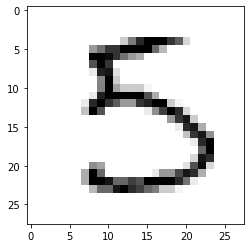

In [19]:
print("Label of digit is:", test_labels[15])
plt.imshow(test_images[15,:,:,0], cmap=plt.cm.binary)

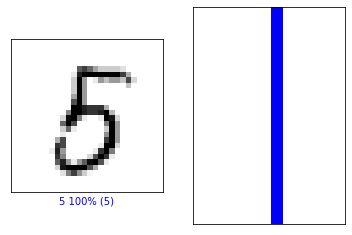

In [20]:
image_index = 45 
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, pred ,test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, pred,  test_labels)

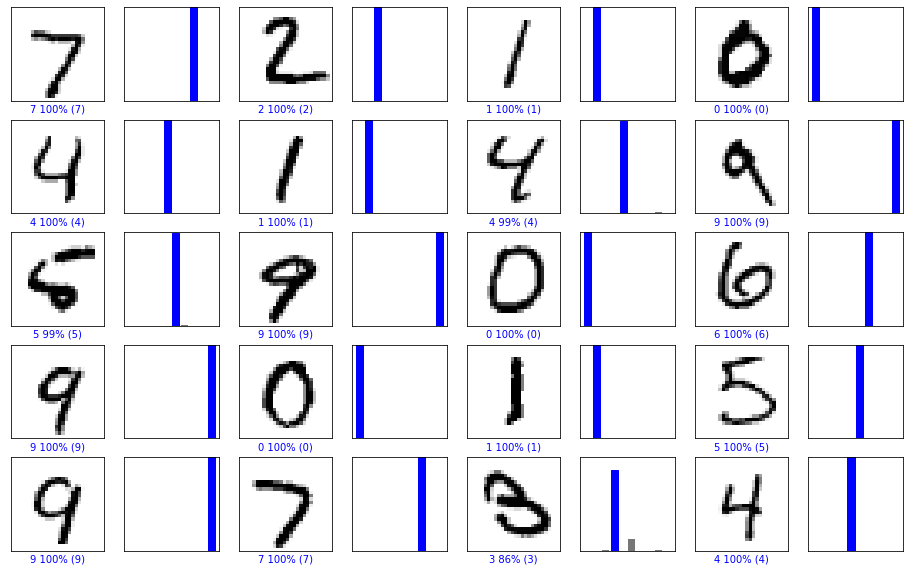

In [21]:
nr = 5
nc = 4
ni = nr*nc
plt.figure(figsize=(2*2*nc, 2*nr))
for i in range(ni):
  plt.subplot(nr, 2*nc, 2*i+1)
  mdl.lab2.plot_image_prediction(i, pred, test_labels, test_images)
  plt.subplot(nr, 2*nc, 2*i+2)
  mdl.lab2.plot_value_prediction(i, pred, test_labels)

In [2]:
!pip install mitdeeplearning
import mitdeeplearning as mdl

     |████████████████████████████████| 2.1 MB 4.4 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=b8cc49f0f23412808e3eb4ef0b2b5e91213a58c16e64f94ce878566b9c634184
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


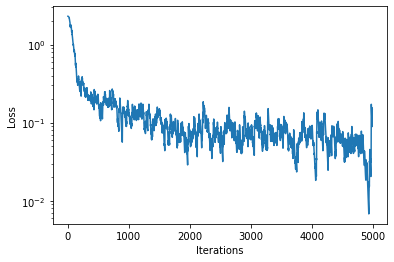

100%|██████████| 5000/5000 [02:02<00:00, 40.78it/s]


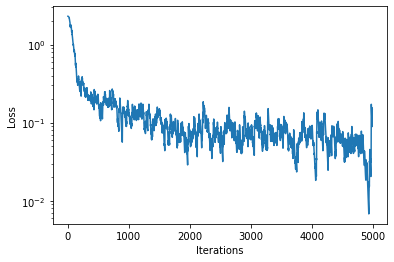

In [24]:
cnn_model = build_cnn_models()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) 
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) 

if hasattr(tqdm, '_instances'): tqdm._instances.clear() 

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)
  with tf.GradientTape() as tape:
    logits = cnn_model(images)

    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) 

  loss_history.append(loss_value.numpy().mean()) 
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value , cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))